In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [2]:
# import file
df=pd.read_csv('houseprice_data.csv')
# details of rows and column
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# No missing valuesin the dataset

In [5]:
# Data Exploration

In [6]:
df.describe()
# statistical summary

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# showing correlation between the features
df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


<AxesSubplot:>

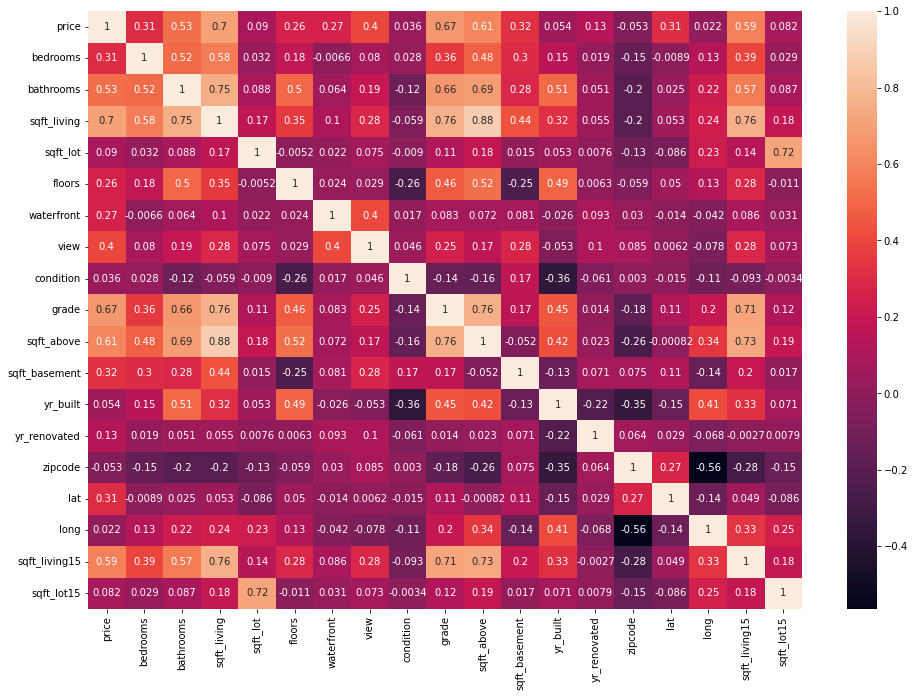

In [8]:
plt.figure(figsize=(16,11))
sns.heatmap(df.corr(),annot=True)

In [9]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

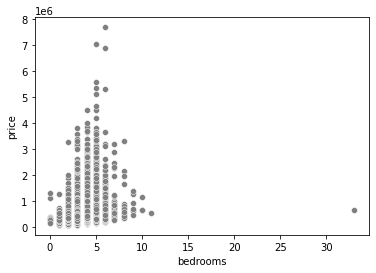

In [10]:
sns.scatterplot(x=df.bedrooms,y=df.price,color="grey")

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

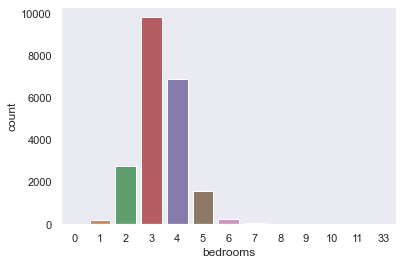

In [11]:
sns.set(style='dark')
sns.countplot(x=df.bedrooms,palette='deep')

In [12]:
#dataset is populated by 3 bedroom


<AxesSubplot:xlabel='yr_built', ylabel='price'>

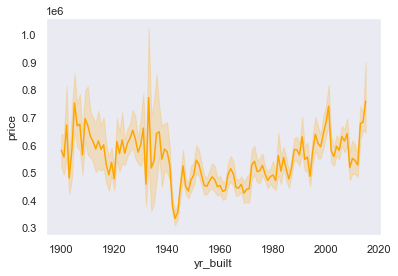

In [13]:
# trend of house prices per year
sns.lineplot(x=df.yr_built,y=df.price,color='orange')

In [14]:
# 1940 shows that house prices were low 

In [15]:
y =df['price']

Text(0, 0.5, 'Price')

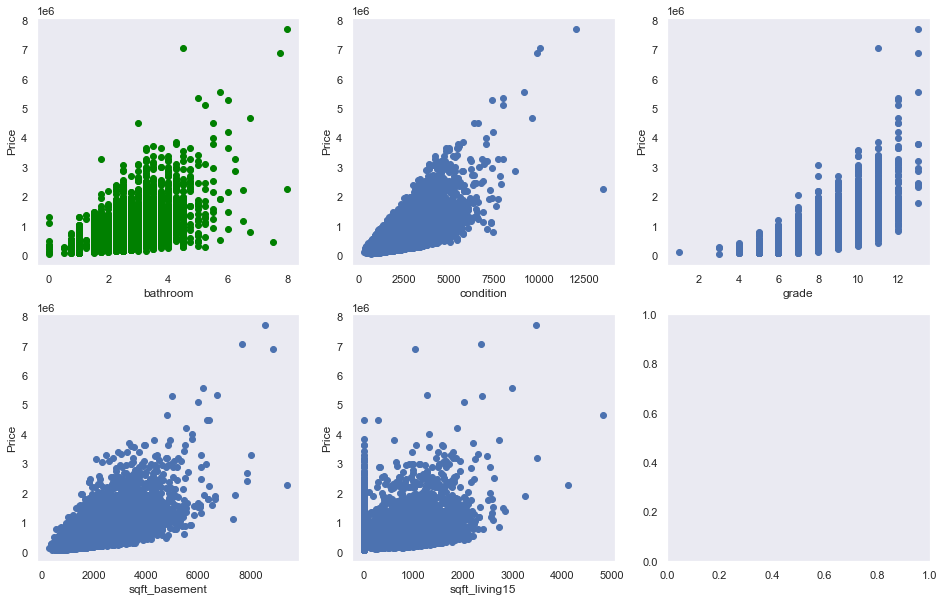

In [16]:
fig1, ax= plt.subplots(2,3,figsize=(16,10))
ax[0,0].scatter(df.iloc[:,2],y,color='green')
ax[0,0].set_xlabel('bathroom')
ax[0,0].set_ylabel('Price')
ax[0,1].scatter(df.iloc[:,3],y)
ax[0,1].set_xlabel('condition')
ax[0,1].set_ylabel('Price')
ax[0,2].scatter(df.iloc[:,9],y)
ax[0,2].set_xlabel('grade')
ax[0,2].set_ylabel('Price')
ax[1,0].scatter(df.iloc[:,10],y)
ax[1,0].set_xlabel('sqft_basement')
ax[1,0].set_ylabel('Price')
ax[1,1].scatter(df.iloc[:,11],y)
ax[1,1].set_xlabel('sqft_living15')
ax[1,1].set_ylabel('Price')


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

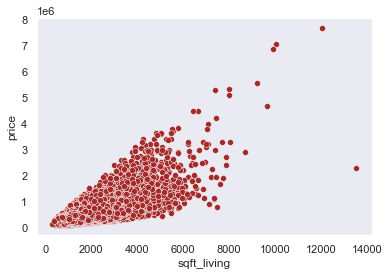

In [17]:
#comparing 2 variables
sns.scatterplot(x=df.sqft_living,y=df.price,color='brown')

In [18]:
# As he sqftliving increases the price of the houses increases. this shows that increasing this can help to make a more informed decision 

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

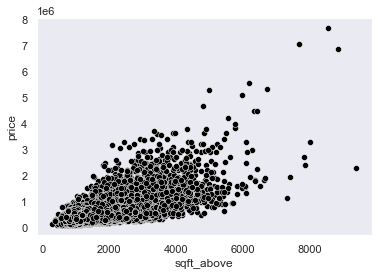

In [19]:
sns.scatterplot(x=df.sqft_above,y=df.price,color='black')

In [20]:
x=df

In [21]:
y=df.iloc[:,0].values

In [22]:
y[0:5]

array([221900., 538000., 180000., 604000., 510000.])

In [23]:
x.shape

(21613, 19)

In [24]:
y.shape

(21613,)

In [25]:
x=df.iloc[:,3].values
y=df.iloc[:,0].values

In [26]:
# splitting of train and test set

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)
print('x-train.shape:',x_train.shape)
print('x-test.shape:',x_test.shape)
print('y-train.shape:',y_train.shape)
print('y-test.shape:',y_test.shape)

x-train.shape: (14408,)
x-test.shape: (7205,)
y-train.shape: (14408,)
y-test.shape: (7205,)


In [28]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)

In [29]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [30]:
pred=regr.predict(x_test)
# mean_squared_error
MSE=mse(y_test,pred)
MSE

72251932678.75192

In [31]:
# coefficients
print('coefficients:',regr.coef_)

coefficients: [273.97842513]


In [32]:
# intercept
print('intercept:',regr.intercept_)

intercept: -29315.417822497664


In [33]:
#cofficient of determination(performance evaluation)
print('cofficient of determination:%2f'%r2_score(y_test,regr.predict(x_test)))

cofficient of determination:0.500052


In [34]:
# visualize testing data 

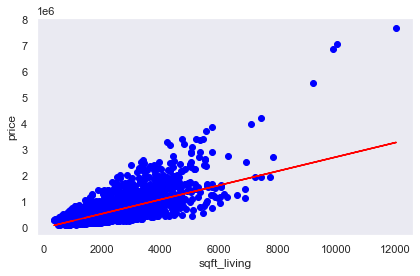

In [35]:
fig1,ax1=plt.subplots()
ax1.scatter(x_test,y_test,color='blue')
ax1.plot(x_test,regr.predict(x_test),color='red')
ax1.set_xlabel('sqft_living')
ax1.set_ylabel('price')
fig1.tight_layout()

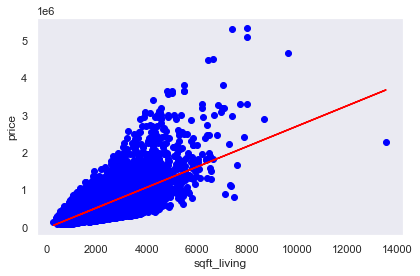

In [36]:
fig2,ax2=plt.subplots()
ax2.scatter(x_train,y_train,color='blue')
ax2.plot(x_train,regr.predict(x_train),color='red')
ax2.set_xlabel('sqft_living')
ax2.set_ylabel('price')
fig2.tight_layout()

In [37]:
x=df[['sqft_living','grade','bathrooms']]
x.shape

(21613, 3)

In [39]:
# more features
x=df[['sqft_living','sqft_above','grade','sqft_living15']].values
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)
regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [41]:
print('coefficients:',regr.coef_)
print('intercept:',regr.intercept_)
print('mean squared error:%8f'% mse(y_test,regr.predict(x_test)))
print('coefficient of determine:%.2f'% r2_score(y_test,regr.predict(x_test)))
    

coefficients: [ 2.18730978e+02 -8.29542303e+01  1.04044302e+05  3.50947080e+01]
intercept: -632172.1980191126
mean squared error:65890394607.029335
coefficient of determine:0.54


In [42]:
x= df.iloc[:,1:].values
y=df.iloc[:,0].values

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=2)
regr=LinearRegression()
regr.fit(x_train,y_train)
print('coefficients:',regr.coef_)
print('intercept:',regr.intercept_)
print('mean squared error:%8f'%mse(y_test,regr.predict(x_test)))
print('coefficient of determination:%.2f'% r2_score(y_test,regr.predict(x_test)))

coefficients: [-3.39577072e+04  3.97332788e+04  1.10482976e+02  9.10904329e-02
  1.07631494e+04  5.16924975e+05  5.32853775e+04  2.83036624e+04
  9.51020551e+04  6.81881049e+01  4.22948708e+01 -2.59486161e+03
  2.30340172e+01 -5.86184478e+02  6.12826582e+05 -2.12501940e+05
  2.34800415e+01 -3.21649320e-01]
intercept: 6794740.806700364
mean squared error:40475314947.228989
coefficient of determination:0.71
